In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from scipy import integrate

In [2]:
def RK4(f, x0, t, h, args=()):
    # Count number of iterations using step size or
    # step height h
    n = (int)(t/h) 
    t0 = 0
    # Iterate for number of iterations
    xs = np.zeros((n+1, len(x0)))
    ts = np.zeros(n+1)
    xs[0] = x0
    ts[0] = t0
    x = x0
    for i in range(1, n + 1):
        # Apply Runge Kutta Formulas to find next value of y
        k1 = h * f(x, t0, *args)
        k2 = h * f(x + 0.5 * k1, t0 + 0.5 * h, *args)
        k3 = h * f(x + 0.5 * k2, t0 + 0.5 * h, *args)
        k4 = h * f(x + k3, t0 + h, *args)
 
        # Update next value of y
        x = x + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
        
        xs[i] = x
        
        # Update next value of x
        t0 = t0 + h
        
        ts[i] = t0
        
    return ts, xs

In [3]:
def MyModel_NoTreatment(X, t, k5, rho_C3, aC, rho_3C, rho_5C, a52, g, gT, d, s15, s5C, eps):
    
    x1, x3, x5 = X
    
    dotx1 = ( 1 + rho_C3*((x3*(1+aC))/(x3+aC)) ) * x1 - g*x1**2 - gT*x1 - s15*x5*np.exp(-k5*x3)*x1
    
    dotx3 = rho_3C*(x1)*(1-x3) - eps*x3
    
    dotx5 = d - d*x5 + rho_5C*(x1/(a52+x1))*x5 - s5C*x1*x5 
    
    return np.array([dotx1, dotx3, dotx5])

In [4]:
# STROMA PARAMETERS

g = 0.35
gT = 0.08

rho_C3 = 1.2
aC = 0.2
rho_3C = 3

eps=0.01

# IMMUNE PARAMETERS

s15 = 0.5
k5 = 0.22

d = 0.23

rho_5C = 0.689
a52 = 0.0000225
s5C = 5625

In [5]:
t = 15
h = 0.00001
x0=[0.0001,0.00,1]
RK4_MyModel = RK4(MyModel_NoTreatment, x0, t, h, args = (k5, rho_C3, aC, rho_3C, rho_5C, a52, g, gT, d, s15, s5C, eps))
ts_progress, xs = RK4_MyModel
x1_progress, x3_progress, x5_progress = xs.T

In [6]:
t = 100
h = 0.001
x0=[0.00001,0.00,1]
RK4_MyModel = RK4(MyModel_NoTreatment, x0, t, h, args = (k5, rho_C3, aC, rho_3C, rho_5C, a52, g, gT, d, s15, s5C, eps))
ts_no_progress, xs = RK4_MyModel
x1_no_progress, x3_no_progress, x5_no_progress = xs.T

Text(0, 0.0031, '1e-3')

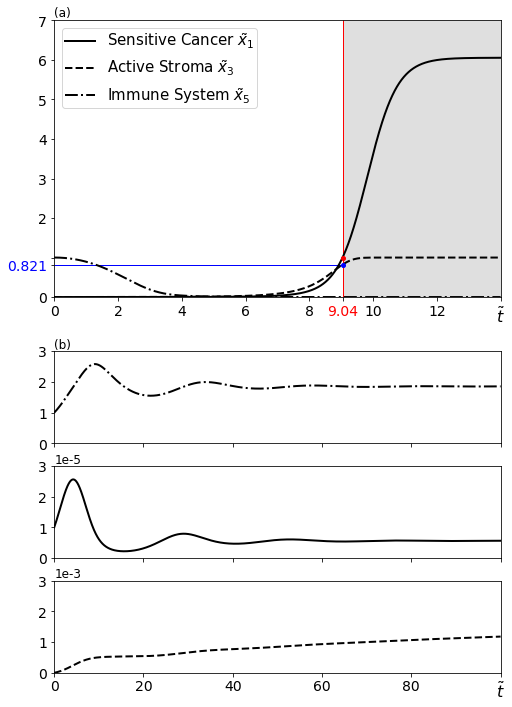

In [7]:
fig, axs = plt.subplots(5, 1, figsize=(8, 12), gridspec_kw={'height_ratios': [3, 0.1, 1, 1, 1]})



axs[0].plot(ts_progress, x1_progress,'k-',linewidth=2,label=r'Sensitive Cancer $\tilde{x}_1$')
axs[0].plot(ts_progress, x3_progress,'k--',linewidth=2,label=r'Active Stroma $\tilde{x}_3$')
axs[0].plot(ts_progress, x5_progress,'k-.',linewidth=2,label=r'Immune System $\tilde{x}_5$')

axs[0].set_xlim(0,14)
axs[0].set_ylim(0,7)

####################################

# The location of particular points like 0.82149.... below, were in all cases found using the function find_nearest below:

# def find_nearest(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx

axs[0].set_yticks([0,0.8214919657496152,1,2,3,4,5,6,7])
axs[0].set_yticklabels(['0','0.821','','2','3','4','5','6','7'],fontsize=14)

####################################

axs[0].get_yticklabels()[1].set_color('b')

axs[0].set_xticks([0,2,4,6,8,9.043759999826792,10,12,14])
axs[0].set_xticklabels(['0','2','4','6','8','9.04','10','12',r'$\tilde{t}$'],fontsize=14)

axs[0].get_xticklabels()[5].set_color('r')

axs[0].get_xticklabels()[-1].set_fontsize(16)

axs[0].vlines(9.043759999826792,0,7,'r',linewidth=1)
axs[0].plot(9.043759999826792,1,'ro',markersize=4)

axs[0].hlines(0.8214919657496152,0,9.043759999826792,'b',linewidth=1)
axs[0].plot(9.043759999826792,0.8214919657496152,'bo',markersize=4)

axs[0].fill_between(np.array([0.0,9.043759999826792,9.043759999826792,14]),np.array([7.0,7.0,0.0,0.0]),7*np.ones(4),alpha=0.25,facecolor='grey',interpolate=True)

axs[0].text(0,7.1,'(a)',fontsize=12)

axs[0].legend(fontsize='15',loc='upper left',borderpad=0.2)   


axs[1].axis('off')


axs[2].plot(ts_no_progress, x5_no_progress,'k-.',linewidth=2,label=r'Immune System $\tilde{x}_5$')

axs[2].set_xlim(0,100)
axs[2].set_ylim(0,3)

axs[2].set_yticks([0,1,2,3])
axs[2].set_yticklabels(['0','1','2','3'],fontsize=14)

axs[2].set_xticks([0,20,40,60,80,100])
axs[2].set_xticklabels(['','','','','',''])

axs[2].text(0,3.1,'(b)',fontsize=12)


axs[3].plot(ts_no_progress, x1_no_progress,'k-',linewidth=2,label=r'Sensitive Cancer $\tilde{x}_1$')

axs[3].set_xlim(0,100)
axs[3].set_ylim(0,3e-5)

axs[3].set_yticks([0.00000,0.00001,0.00002,0.00003])
axs[3].set_yticklabels(['0','1','2','3'],fontsize=14)

axs[3].set_xticks([0,20,40,60,80,100])
axs[3].set_xticklabels(['','','','','',''])

axs[3].text(0,0.000031,'1e-5',fontsize=12)


axs[4].plot(ts_no_progress, x3_no_progress,'k--',linewidth=2,label=r'Active Stroma $\tilde{x}_3$')

axs[4].set_xlim(0,100)
axs[4].set_ylim(0,3e-3)

axs[4].set_xticks([0,20,40,60,80,100])
axs[4].set_xticklabels(['0','20','40','60','80',r'$\tilde{t}$'],fontsize=14)

axs[4].get_xticklabels()[-1].set_fontsize(16)

axs[4].set_yticks([0.000,0.001,0.002,0.003])
axs[4].set_yticklabels(['0','1','2','3'],fontsize=14)

axs[4].text(0,0.0031,'1e-3',fontsize=12)